In [1]:
library(ggplot2)
#library(DESeq2)
library(Seurat)
#library(SeuratDisk)
library(sceasy)
library(reticulate)
library(magrittr)
library(anndata)

Attaching SeuratObject

Loading required package: reticulate



In [2]:
h5ad_file <- "./CTCL/object_revision/all_tumourcell_raw_20240707.h5ad"
sdata <- read_h5ad(h5ad_file)
sdata <- CreateSeuratObject(counts = t(as.matrix(sdata$X)), meta.data = sdata$obs)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 15.4 GiB”


In [3]:
table(sdata$donor)


          CTCL1           CTCL2           CTCL3           CTCL4           CTCL5 
           8069            1907            9524            1073            7724 
          CTCL6           CTCL7           CTCL8            MF14            MF15 
           3773            3673            7139            4183            1146 
           MF17            MF21            MF22            MF26            MF28 
           3769            1775             289             628           11438 
           MF30           MF309           MF311           MF312             P65 
           2438           10161           14487             306             814 
            P73             P84             P90            P107            P138 
            331            1822              62            1140             705 
PR001409E_18_1A    PR2533_18_1A PR008096T_19_1A PR018817H_21_1B PR038176R_19_1A 
           2433            1132            3125            6100            1047 
PR839543V_20_1A            

In [4]:
cc_mat <- c()
col <- c()
for (donor in unique(sdata$donor)) {
    sdata_sub <- subset(sdata, cells = colnames(sdata)[which(sdata$donor == donor)])
    mat <- sdata_sub@assays$RNA@counts
    Th1 <- sum(mat['TBX21',]>0 & mat['GATA3',] == 0 & mat['RORC',] == 0)
    Th2 <- sum(mat['GATA3',]>0 & mat['TBX21',] == 0 & mat['RORC',] == 0)
    Th17 <- sum(mat['RORC',]>0 & mat['TBX21',] == 0 & mat['GATA3',] == 0)
    Th1_Th2 <- sum(mat['TBX21',]>0 & mat['GATA3',] > 0 & mat['RORC',] == 0)
    Th2_Th17 <- sum(mat['GATA3',]>0 & mat['TBX21',] == 0 & mat['RORC',] > 0)
    Th1_Th17 <- sum(mat['TBX21',]>0 & mat['GATA3',] == 0 & mat['RORC',] > 0)
    Th1_Th2_Th17 <- sum(mat['TBX21',]>0 & mat['GATA3',] > 0 & mat['RORC',] > 0)
    cc <- c(Th1, Th2, Th17, Th1_Th2, Th2_Th17, Th1_Th17, Th1_Th2_Th17)
    cc_mat <- cbind(cc_mat, cc)
    col <- c(col, donor)
}
colnames(cc_mat) <- col
rownames(cc_mat) <- c('Th1', 'Th2', 'Th17', 'Th1_Th2',
                      'Th2_Th17', 'Th1_Th17', 'Th1_Th2_Th17')

In [5]:
cc_mat

,CTCL1,CTCL5,CTCL6,CTCL7,CTCL8,CTCL2,CTCL3,CTCL4,PT52,PT11,⋯,PR839543V_20_1A,MF309,MF311,MF312,P107,P138,P65,P73,P84,P90
Th1,2,203,281,283,31,64,11,53,0,36,⋯,70,82,6,4,56,27,1,1,2,0
Th2,5098,3776,1025,455,1271,645,3838,251,89,141,⋯,4132,4016,3777,154,346,103,257,128,1689,22
Th17,2,303,100,2,148,189,1002,21,1,12,⋯,9,18,3,0,5,16,48,7,1,2
Th1_Th2,4,696,201,61,8,87,10,9,0,3,⋯,101,72,2,0,42,3,1,5,4,0
Th2_Th17,2,1025,71,2,50,203,1150,11,2,2,⋯,6,28,4,0,2,3,21,23,3,1
Th1_Th17,0,55,9,0,4,22,6,1,0,0,⋯,0,2,0,0,1,0,0,0,0,0
Th1_Th2_Th17,0,267,19,0,0,23,6,2,0,0,⋯,0,0,0,0,2,0,0,3,0,0


In [6]:
cc_mat_per <- expss::prop_col(cc_mat)
cc_mat_per

,CTCL1,CTCL5,CTCL6,CTCL7,CTCL8,CTCL2,CTCL3,CTCL4,PT52,PT11,⋯,PR839543V_20_1A,MF309,MF311,MF312,P107,P138,P65,P73,P84,P90
Th1,0.0003915427,0.032094862,0.164712778,0.35242839,0.020502646,0.05190592,0.0018263324,0.152298851,0.00000000,0.18556701,⋯,0.016211209,0.0194404931,0.0015822785,0.02531646,0.123348018,0.17763158,0.00304878,0.005988024,0.0011771630,0.00
Th2,0.9980422866,0.596996047,0.600820633,0.56662516,0.840608466,0.52311436,0.6372239748,0.721264368,0.96739130,0.72680412,⋯,0.956924502,0.9521100047,0.9960443038,0.97468354,0.762114537,0.67763158,0.78353659,0.766467066,0.9941141848,0.88
Th17,0.0003915427,0.047905138,0.058616647,0.00249066,0.097883598,0.15328467,0.1663622779,0.060344828,0.01086957,0.06185567,⋯,0.002084298,0.0042674253,0.0007911392,0.00000000,0.011013216,0.10526316,0.14634146,0.041916168,0.0005885815,0.08
Th1_Th2,0.0007830854,0.110039526,0.117819461,0.07596513,0.005291005,0.07055961,0.0016603022,0.025862069,0.00000000,0.01546392,⋯,0.023390459,0.0170697013,0.0005274262,0.00000000,0.092511013,0.01973684,0.00304878,0.029940120,0.0023543261,0.00
Th2_Th17,0.0003915427,0.162055336,0.041617819,0.00249066,0.033068783,0.16463909,0.1909347501,0.031609195,0.02173913,0.01030928,⋯,0.001389532,0.0066382172,0.0010548523,0.00000000,0.004405286,0.01973684,0.06402439,0.137724551,0.0017657446,0.04
Th1_Th17,0.0000000000,0.008695652,0.005275498,0.00000000,0.002645503,0.01784266,0.0009961813,0.002873563,0.00000000,0.00000000,⋯,0.000000000,0.0004741584,0.0000000000,0.00000000,0.002202643,0.00000000,0.00000000,0.000000000,0.0000000000,0.00
Th1_Th2_Th17,0.0000000000,0.042213439,0.011137163,0.00000000,0.000000000,0.01865369,0.0009961813,0.005747126,0.00000000,0.00000000,⋯,0.000000000,0.0000000000,0.0000000000,0.00000000,0.004405286,0.00000000,0.00000000,0.017964072,0.0000000000,0.00


In [7]:
cc_mat_per_round <- round(cc_mat_per,2)

In [8]:
hec_new <- reshape2::melt(t(cc_mat_per_round),value.name = "prop")

In [9]:
hec_new$Var1 <- factor(hec_new$Var1, levels = c('CTCL2','CTCL6','CTCL7','P107','P138','PR001409E_18_1A','PR038176R_19_1A','CTCL3','CTCL4',
                                                'CTCL8','MF15','MF22','PT50','PR2533_18_1A','P65','P90',
                                                'MF14','MF26',
                                                'CTCL1','CTCL5','MF17','MF21','MF27','MF30','PT56','PT35','PT55','PT53','PT47','PT52','PR018817H_21_1B',
                                                'P84','P73','MF312','MF28','PR008096T_19_1A','PR839543V_20_1A','MF309','MF311','PT11')) ### sort as stage

Warning message in geom_text(aes(fill = hec_new$prop, label = round(hec_new$prop, :
“Ignoring unknown aesthetics: fill”
Warning message:
“Use of `hec_new$prop` is discouraged.
ℹ Use `prop` instead.”
Warning message:
“Use of `hec_new$prop` is discouraged.
ℹ Use `prop` instead.”


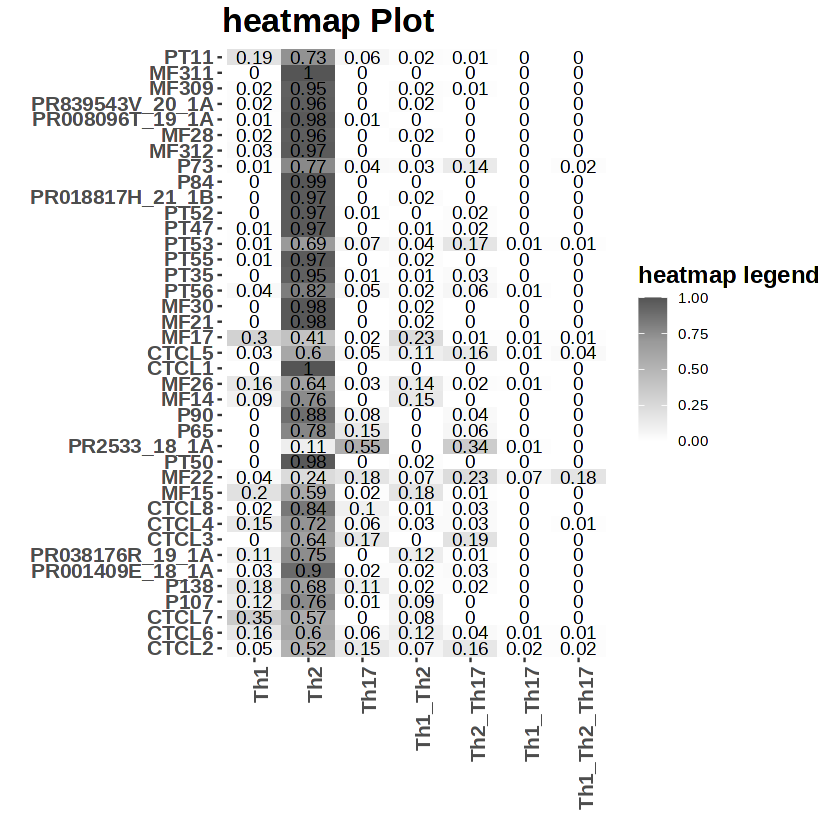

In [16]:
#pdf('./Th1_Th2_Th17.pdf',w = 8, h = 9)
ggplot(hec_new,aes(x=Var2,y=Var1,fill=prop))+geom_tile()+
  geom_text(aes(fill = hec_new$prop, label = round(hec_new$prop, 2)))+
  scale_fill_gradient2(high = "black", 
                       mid = "grey60", 
                       low = "white", 
                       midpoint = 0.7) + 
  theme(panel.grid.major.x=element_blank(), #no gridlines
        panel.grid.minor.x=element_blank(), 
        panel.grid.major.y=element_blank(), 
        panel.grid.minor.y=element_blank(),
        panel.background=element_rect(fill="white"), # background=white
        axis.text.x = element_text(angle=90, hjust = 1,vjust=1,size = 12,face = "bold"),
        plot.title = element_text(size=20,face="bold"),
        axis.text.y = element_text(size = 12,face = "bold")) + 
  ggtitle("heatmap Plot")+
  theme(legend.title=element_text(face="bold", size=14)) + 
  scale_x_discrete(name="") +
  scale_y_discrete(name="") +
  labs(fill="heatmap legend")
#dev.off()

In [11]:
cc_mat_per_1 <- cc_mat_per %>% t() %>% as.data.frame() %>%
                dplyr::mutate(Stage = "Late")
### cc_mat_per no round

In [12]:
cc_mat_per_1[c('MF14','MF15','P90',
             'P65', 'MF22', 'MF26', 'CTCL8','CTCL4',
             'CTCL3', 'P138','P107','CTCL7',
             'CTCL6', 'CTCL2','PT50',
              'PR001409E_18_1A','PR038176R_19_1A','PR2533_18_1A'), 'Stage'] <- "Early"
cc_mat_per_1

,Th1,Th2,Th17,Th1_Th2,Th2_Th17,Th1_Th17,Th1_Th2_Th17,Stage
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CTCL1,0.0003915427,0.9980423,0.0003915427,0.0007830854,0.0003915427,0.0000000000,0.0000000000,Late
CTCL5,0.0320948617,0.5969960,0.0479051383,0.1100395257,0.1620553360,0.0086956522,0.0422134387,Late
CTCL6,0.1647127784,0.6008206,0.0586166471,0.1178194607,0.0416178195,0.0052754982,0.0111371630,Early
CTCL7,0.3524283935,0.5666252,0.0024906600,0.0759651308,0.0024906600,0.0000000000,0.0000000000,Early
CTCL8,0.0205026455,0.8406085,0.0978835979,0.0052910053,0.0330687831,0.0026455026,0.0000000000,Early
CTCL2,0.0519059205,0.5231144,0.1532846715,0.0705596107,0.1646390916,0.0178426602,0.0186536902,Early
CTCL3,0.0018263324,0.6372240,0.1663622779,0.0016603022,0.1909347501,0.0009961813,0.0009961813,Early
CTCL4,0.1522988506,0.7212644,0.0603448276,0.0258620690,0.0316091954,0.0028735632,0.0057471264,Early
PT52,0.0000000000,0.9673913,0.0108695652,0.0000000000,0.0217391304,0.0000000000,0.0000000000,Late


Warning message in geom_violin(width = 0.8, outlier.colour = "white", outlier.size = 0.5, :
“Ignoring unknown parameters: `outlier.colour` and `outlier.size`”


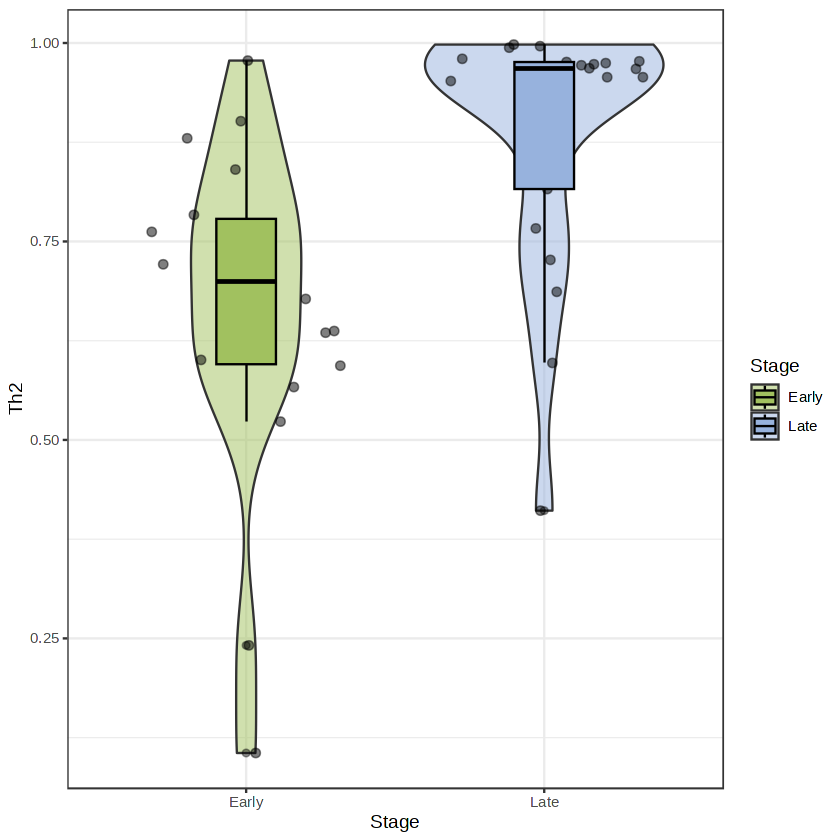

In [15]:
#pdf('./figures/Th1_Th2_Th17_boxplot.pdf',w = 4, h = 7)
set.seed(123)
ggplot(data=cc_mat_per_1, aes(x=Stage, y=Th2, fill=Stage))+
  geom_violin(width=0.8, outlier.colour = "white", outlier.size = 0.5, alpha=0.5)+
  ggbeeswarm::geom_quasirandom(method = "pseudorandom", dodge.width=0.2, size=2, shape=19, alpha=0.5) +
  scale_fill_manual(values = c("#A1C15F","#97B2DD")) +
  geom_boxplot(width=0.2,color="black",outlier.alpha = 0.4)+
  #geom_boxplot(notch=T, width=0.1, fill=NA, outlier.shape=NA, size=0.3) +
  #geom_point(aes(group=samp_loc),position=position_jitter(width = 0.1,height = 0),alpha=0.7,shape=19, color="grey60")+
  #geom_violin(width=2,color="black")+
  #geom_errorbar(data=bb, mapping = aes(x=tissue, y=mtb.median, ymin = mtb.median-mtb.sd, 
  #                                   ymax=mtb.median+mtb.sd),
  #            size=0.5, color="red",width=0)+
  #geom_point(data=bb,mapping =aes(x=tissue, y=mtb.median),
  #           size=9,color="red",shape="_") +
  #coord_cartesian(ylim = c(0,210))+
  theme_bw()
#dev.off()

In [14]:
c1 <- cc_mat_per_1$Th2[which(cc_mat_per_1$Stage == "Early")]
c2 <- cc_mat_per_1$Th2[which(cc_mat_per_1$Stage == "Late")]
wilcox.test(c1,c2)


	Wilcoxon rank sum exact test

data:  c1 and c2
W = 66, p-value = 0.0003192
alternative hypothesis: true location shift is not equal to 0
